## Exploring Text Data

Twitter Tweets Analysis
we have taken the challenge of Analyzing Sentiments from Twitter data, so we will focus on how to generate word frequencies and use it to create Word Clouds in Python that will help us get a better overall understanding of the dataset

In [1]:
#Load the dataset
import pandas as pd 
dataset = pd.read_csv('E:/Exploring_Text_Data/tweets.csv', encoding = 'ISO-8859-1')

dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


As can be seen above, **text** column is of interest to us as it contains the tweet. At this point, you don't have to worry about other columns as that will be handled in future modules. Let's go ahead and inspect some of the tweets.

### 2. Generating Word Frequency

Let's first generate a frequency table of all the words present in all the tweets combined.

In [4]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

word_freq=gen_freq(dataset.text.str)

### 3. EDA using Word Clouds

Now that you have succesfully created a frequency table, you can use that to create multiple **visualizations** in the form of word clouds. Sometimes, the quickest way to understand the context of the text data is using a word cloud of top 100-200 words. Let's see how to create that in Python.

**Note:-** You'll use the `WordCloud` library of Python. You can install it by - 

`pip install wordcloud`

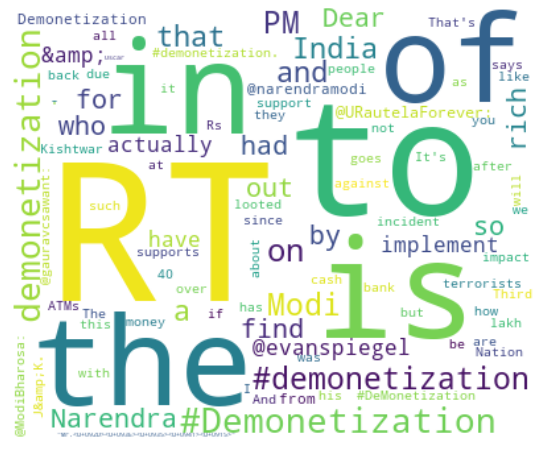

In [5]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Few things to Note:-**

1. There is noise in the form of "RT" and "&amp" which can be removed from the word frequency.
2. Stop words like "the", "in", "to", "of" etc. are obviously ranking among the top frequency words but these are just constructs of the English language and are not specific to the people's tweets.
3. Words like "demonetization" have occured multiple times. The reason for this is that the current text is not **Normalized** so words like "demonetization", "Demonetization" etc. are all considered as different words.



#### Text Cleaning


In [6]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text



#### Stop words Removal



In [7]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'through', 'com', 'being', 'we', "they'd", 'while', "she'd", 'herself', "weren't", 'both', 'once', "they'll", 'would', 'get', 'otherwise', 'out', 'into', "we'd", "shan't", 'is', 'with', 'there', 'are', 'however', 'also', 'down', 'ours', "aren't", "you've", 'hers', "hadn't", 'as', "where's", "isn't", 'was', 'her', 'like', 'http', 'about', "let's", 'those', 'where', "what's", "they're", 'such', 'during', 'only', "won't", 'yourselves', 'each', 'ourselves', 'itself', 'ever', 'from', "shouldn't", 'too', "when's", "why's", 'before', "i'm", 'that', 'nor', 'the', "he'd", 'between', 'so', 'off', 'they', 'up', 'or', 'yours', 'this', "wouldn't", 'be', 'when', "you'd", 'does', "don't", 'its', 'cannot', 'more', 'ought', 'for', 'he', 'yourself', "i'll", 'by', 'own', 'she', 'had', "we'll", 'him', "we've", 'you', "i've", "they've", 'until', 'my', 'on', "he'll", 'and', 'www', 'can', 'these', 'me', 'if', 'did', 'your', "couldn't", 'then', 'doing', "that's", 'not', 'could', 'same', 'shall', 'than', 'our

Now that you know what all has to be changed to improve our word cloud, let's make some wordclouds. We'll call the previous functions of `clean_text()` and `gen_freq()` to perform cleaning and frequency computation operation respectively and drop the words present in `STOPWORDS` from the `word_freq` dictionary.

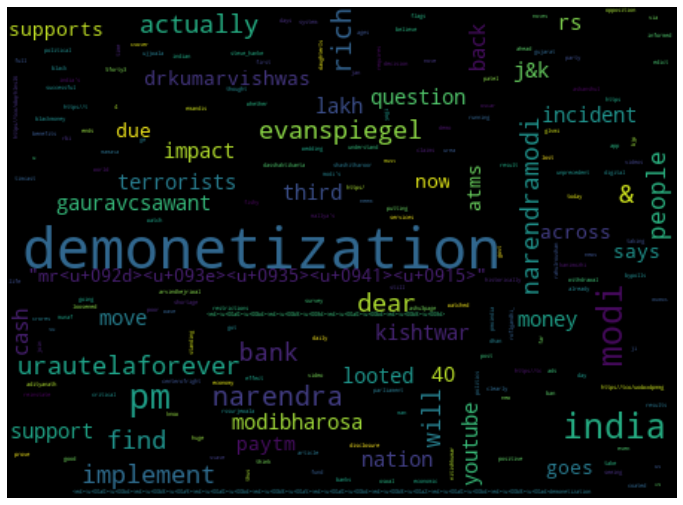

In [9]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Areas of interest of the general twitter users:

 - It is evident that people are talking about govt. policies like **demonetization**, **J&K**. 
 - There are some personalitites that are mentioned numerous times like **evanspiegel**, **PM Narendra Modi**, **Dr Kumar Vishwas** etc.
 - There are also talks about **oscars**, **youtube** and **terrorists**
 - There are many sub-topics that revolve around demonetization like **atms**, **bank**, **cash**, **paytm** etc. Which tells that many people are concerned about it.
 .